#### 3. Исследовать модификации градиентного спуска.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from criteria import CountStopLossCriteria
from gradient import *
from graphic import F, F10d, F3d, G
from loss import AbsoluteLoss

NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)
NaiveGradient()
Momentum(0.9)
Nesterov(0.9)
AdaGrad()
RMSProp(0.99)
Adam(0.9, 0.99)


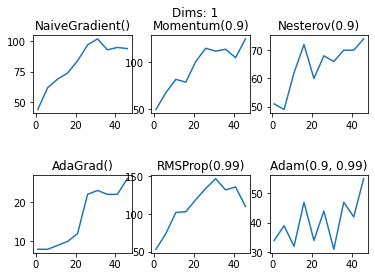

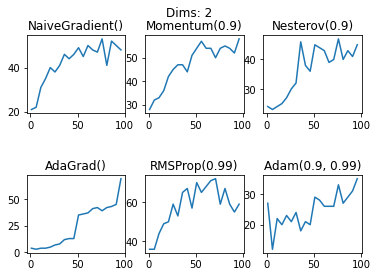

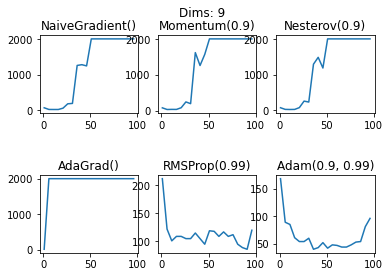

In [4]:
for graphic in [F(), F3d(), F10d()]:
    count_points = graphic.points_x.shape[0]
    batch_sizes = [i for i in range(1, count_points + 1, 5)]
    n = graphic.linear.n + 1

    fig, axs = plt.subplots(2, 3)
    plt.subplots_adjust(hspace=0.8)
    fig.suptitle(f"Dims: {graphic.linear.n}")

    i_idx = 0
    j_idx = 0

    for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
                AdaGrad(n), RMSProp(n, 0.99), Adam(n, 0.9, 0.99)]:
        print(str(grad))

        w = np.array([0] * (graphic.linear.n + 1))
        epoches = np.array([gradient(graphic, 0.1, w, AbsoluteLoss(), 2000,
                                     batch_size, CountStopLossCriteria(20), graphic.noise_sum, grad)[0]
                                for batch_size in batch_sizes])

        axs[j_idx, i_idx].set_title(str(grad))
        axs[j_idx, i_idx].plot(batch_sizes, epoches)

        i_idx += 1
        j_idx += i_idx // 3
        i_idx %= 3

    plt.show()

#### 4. Исследовать сходимость алгоритмов. Сравнить различные методы по скорости сходимости, надёжности, машинным ресурсам.

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from criteria import CountStopLossCriteria
from gradient import *
from graphic import F, F10d, F3d, G
from loss import AbsoluteLoss
from time import time

graphic = F10d()
n = graphic.linear.n + 1
batch_size = graphic.points_x.shape[0] // 3

for grad in [NaiveGradient(), Momentum(n, 0.9), Nesterov(n, 0.9),
             AdaGrad(n), RMSProp(n, 0.999), Adam(n, 0.9, 0.99)]:
    print(str(grad))
    start = time()
    epoches, w = gradient(graphic, 0.1, np.array([0] * n), AbsoluteLoss(), 5000,
                          batch_size, CountStopLossCriteria(5), 5e-5, grad)
    print(f"Max difference of dimension: {np.max(np.abs((graphic.linear.a - w) / graphic.linear.a))}")
    print(f"Epoches(Operations): {epoches}")
    print(f"Memory: {grad.get_memory_cost(batch_size)}")
    print(f"Time: {time() - start} s")
    print()

NaiveGradient()
Max difference of dimension: 0.27464579337581896
Epoches(Operations): 318
Memory: 0
Time: 2.196845054626465 s

Momentum(0.9)
Max difference of dimension: 0.33487101016882953
Epoches(Operations): 536
Memory: 20
Time: 3.618543863296509 s

Nesterov(0.9)
Max difference of dimension: 0.5530806899493886
Epoches(Operations): 4080
Memory: 30
Time: 27.7646484375 s

AdaGrad()
Max difference of dimension: 0.27833870121017024
Epoches(Operations): 93
Memory: 20
Time: 0.6420016288757324 s

RMSProp(0.999)
Max difference of dimension: 0.20851080869541855
Epoches(Operations): 1136
Memory: 30
Time: 7.734198093414307 s

Adam(0.9, 0.99)
Max difference of dimension: 0.12380808853924459
Epoches(Operations): 1641
Memory: 50
Time: 11.184356927871704 s

